In [9]:
import pandas as pd

In [10]:
data = pd.read_csv('data/svm_data.csv', sep=';', index_col=0)

data

,xi1,xi2,yi
xi,,,
x1,3.50,4.25,1.0
x2,4.00,3.00,1.0
x3,4.00,4.00,1.0
x4,4.50,1.75,1.0
x5,4.90,4.50,1.0
x6,5.00,4.00,1.0
x7,5.50,2.50,1.0
x8,5.50,3.50,1.0
x9,0.50,1.50,-1.0


a) Calculate w and b for the support vectors. The Lagrange multipliers are already calculated: (3.5 P.)

| xi  | ai     |
|-----|--------|
| x1  | 0.0437 | 
| x2  | 0.2162 | 
| x4  | 0.1427 | 
| x13 | 0.3589 | 
| x14 | 0.0437 |
 

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
lagrange_multipliers = {'x1': 0.0437,
                        'x2': 0.2162,
                        'x4': 0.1427,
                        'x13': 0.3589,
                        'x14': 0.0437}

sv_names = list(lagrange_multipliers.keys())
a = list(lagrange_multipliers.values())

In [13]:
x = data.loc[sv_names, ['xi1', 'xi2']].to_numpy()
t = data.loc[sv_names, 'yi'].to_numpy()

x

array([[3.5 , 4.25],
       [4.  , 3.  ],
       [4.5 , 1.75],
       [2.  , 2.  ],
       [2.5 , 0.75]])

In [14]:
a = np.array(a).reshape((-1, 1))
t = t.reshape((-1, 1))

w = sum(a * t * x)

w

array([0.83285 , 0.333475])

In [15]:
b = np.mean(t - (x @ w))

b

-3.332071249999999

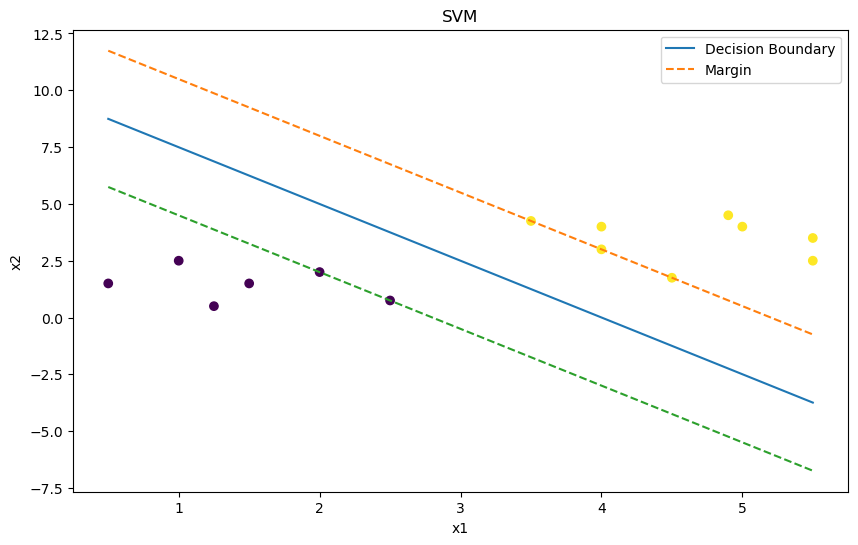

In [16]:
x = data[['xi1', 'xi2']]
t = data['yi']


# this is definitely in the cheat sheet
def decision_boundary(x, w, b, offset): return -(w[0] / w[1]) * x - (b + offset) / w[1]


x_ax = np.linspace(x['xi1'].min(), x['xi1'].max(), 200)

db = decision_boundary(x_ax, w, b, 0)
margin_pos = decision_boundary(x_ax, w, b, -1)
margin_neg = decision_boundary(x_ax, w, b, 1)

plt.figure(figsize=(10, 6))
plt.title('SVM')
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_ax, db, label="Decision Boundary")
plt.plot(x_ax, margin_pos, "--", label="Margin")
plt.plot(x_ax, margin_neg, "--")

plt.legend()

# Add the scatter plot for the data points
plt.scatter(x['xi1'], x['xi2'], c=t)

plt.show()